# <font color=blue>Assignment</font>
Using the [dataset](https://sci2s.ugr.es/keel/dataset/data/imbalanced/cleveland-0_vs_4.zip) for the [risk of heart attack](https://sci2s.ugr.es/keel/dataset.php?cod=980) with class imbalance:

1. Create a logistic regression model and measure the performance of it.
2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [33]:
#lines = []
#with open('cleveland-0_vs_4.dat') as f:
#    lines = f.readlines()

In [64]:
#lines[18:20]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


data=pd.read_csv('cleveland-0_vs_4.dat')

In [2]:
import matplotlib.pyplot as plt

In [21]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    float64
 12  thal      177 non-null    float64
 13  num       177 non-null    object 
 14  Class     177 non-null    uint8  
dtypes: float64(13), object(1), uint8(1)
memory usage: 19.7+ KB


### A few EDA

In [7]:
data['ca'] = pd.to_numeric(data.ca, errors='coerce')
data['ca'].fillna(0, inplace=True)
data['thal'] = pd.to_numeric(data.thal,errors='coerce')
data['thal'].fillna(3, inplace=True)

In [8]:
data['Class'] = pd.get_dummies(data.num, drop_first=True)

### Logistic Regression Model

In [9]:
X = data.drop(['num', 'Class'], axis=1)

In [10]:
y= data.Class

In [11]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

pred_train = logreg_model.predict(X_train)
pred_test = logreg_model.predict(X_test)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
  

### Testing if data is imbalanced

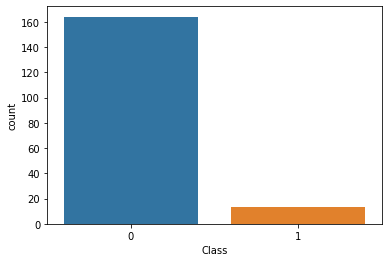

In [12]:
sns.countplot(data.Class)
plt.show()

In [13]:
print("Positive ratio     : %{:.2f}".format(sum(data.Class)/len(data.Class)*100))
print("Negative ratio     : %{:.2f}".format((len(data.Class)-sum(data.Class))/len(data.Class)*100))

Positive ratio     : %7.34
Negative ratio     : %92.66


We see that data is not balanced. Majority of the data belongs to Class=0 category.

### Changing metrics

Accuracy metric is not appropriate with imbalanced data. So we should use different metrics instead of it.

In [14]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [15]:
create_model(X,y)

Accuracy : 0.9166666666666666

Train Dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       131
           1       0.89      0.80      0.84        10

    accuracy                           0.98       141
   macro avg       0.94      0.90      0.92       141
weighted avg       0.98      0.98      0.98       141

Test Dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36



We observe that while Accuracy is very high in test set, other scores are lower for Class=1. The model is unsuccessful while predicting Class=1.

### Upsampling

In [16]:
from sklearn.utils import resample

In [17]:
negative = data[data.Class == 0]
positive = data[data.Class == 1]

positive_upsampling = resample(positive,
                               replace = True,
                               n_samples = len(negative),
                               random_state = 111)

upsampled_data = pd.concat([negative, positive_upsampling])
upsampled_data.Class.value_counts()

1    164
0    164
Name: Class, dtype: int64

Let's create the model and see the results.

In [18]:
X1 = upsampled_data.drop(['num', 'Class'], axis=1)
y1 = upsampled_data['Class']

create_model(X1,y1)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



There is a significant increase in other performance metrics when we resample.

### Downsampling

In [19]:
negative = data[data.Class == 0]
positive = data[data.Class == 1]

negative_downsampling = resample(negative,
                               replace = True,
                               n_samples = len(positive),
                               random_state = 111)

downsampled_data = pd.concat([positive, negative_downsampling])
downsampled_data.Class.value_counts()

1    13
0    13
Name: Class, dtype: int64

In [20]:
X1 = downsampled_data.drop(['num', 'Class'], axis=1)
y1 = downsampled_data['Class']

create_model(X1,y1)

Accuracy : 1.0

Train Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### SMOTE

In [25]:
from imblearn.over_sampling import SMOTE

y = data.Class
X = data.drop(['num', 'Class'], axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [26]:
create_model(X_smote, y_smote)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



### ADASYN

In [28]:
from imblearn.over_sampling import ADASYN

y = data.Class
X = data.drop(['num', 'Class'], axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [29]:
create_model(X_adasyn, y_adasyn)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       132

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



#### Result:

Upsampling, SMOTE and ADASYN produce same results. Downsampling gives perfect results however sample size is very limited. 